# The influence of healthcare spending on life expectancy
## An essay by Frank Kloosterman & Jochem Vlug

![Healthcare](http://northcentralhealthdistrict.org/wp-content/uploads/2017/07/Coalition-banner.jpg)

In [1]:
import pandas as pd #pandas, needed for data frames.
import numpy as np #numpy, for math operations and arrays.
import matplotlib.pyplot as plt #matplotlib, for making plots.
import missingno as msno #missingno, a usefull library for checking missing values.
import pdb #pythondebugger, native debugger of python.
%matplotlib inline 
#plots graphs directly below codeblocks.

In [2]:
#Worlddatabank on Social Development Goals
world_bank = pd.read_csv("data/SDG_csv/SDGData.csv") #TODO: URL MUST BE ONLINE
#Dataset on life expectancy, WHO
life_expectancy = pd.read_csv("data/life-expectancy.csv") #TODO: URL MUST BE ONLINE
#Dataset on household pocketmoney, NHA. Second row is empty, so we skip it.
household_ppp = pd.read_excel("data/NHA-indicators.xlsx",skiprows=[1],index_col=0) #TODO: URL MUST BE ONLINE 

In [3]:
#Search world_bank database for keyphrase
def searchData(myInput):
    variableList = []
    for sentence in list(world_bank["Indicator Name"].values):
        newSentence = np.array(sentence.split(" "))
        for words in (newSentence):
            if words.lower() == myInput.lower(): 
                variableList += [sentence]

    variableList = pd.unique(variableList)
    return variableList
searchData("") #insert search input here.
                                


array(['Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)'],
      dtype=object)

In [ ]:
#First summarise status of data by making a NaN matrix.
msno.matrix(world_bank.sample(len(world_bank)))
msno.matrix(life_expectancy.sample(len(life_expectancy)))
msno.matrix(household_ppp.sample(len(household_ppp)))

In [4]:
#This function makes a Top 20 list of richest and poorest countries based on GDP per capita, PPP.
def findTop20():
    #Waarom doen we dit zo? Kunnen we niet gewoon world_bank["Country Name"].unique() nemen?
    countries = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["Country Name"]
    GDP_2016 = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2016"]
    GDP_2017 = world_bank[world_bank["Indicator Name"]== 'GDP per capita, PPP (constant 2011 international $)']["2017"]

    GDP_1617 = countries.to_frame().join(GDP_2017.to_frame()).join(GDP_2016.to_frame())
    
    #Mask the entries in the top 20's of the list which are actually not countries.
    GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Macao SAR, China")
    GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="Hong Kong SAR, China")
    GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="North America")
    #Masked San Marino as well, since almost no data available
    GDP_1617 = GDP_1617.mask(GDP_1617["Country Name"]=="San Marino")

    #Define the top20's
    lowest_20 = GDP_1617.sort_values("2017")[0:20]
    highest_20 = GDP_1617.sort_values("2017", ascending=False)[0:20]

    lowest_countries = lowest_20["Country Name"]
    highest_countries = highest_20["Country Name"]
    
    #Concate the highest and lowest together.
    newCountries = pd.concat([lowest_countries, highest_countries])
    #Changes the country names to match other database.
    #Tried to do this when merging databases, since Life_expectanc is also different
    #newCountries.iloc[3]="DRC"
    #newCountries.iloc[12]="Gambia"
    #newCountries.iloc[30]="United States of America"
    
    
    newCountries = newCountries.sort_values(ascending = True)
    
    #if, for some reason, the top 20 does not contain 20 entries, throw an error.
    if len(lowest_countries) < 19:
        return str("Something went wrong.")
    else:
        return list(newCountries.values)
       


In [5]:
#Using the top 20 richest and poorest countries, find matching data in other dataset.
def match_household(l):
    l[10]="DRC"
    l[13]="Gambia"
    l[39]="United States of America"
    newDF = household_ppp.loc[l]
    return newDF
match_household(findTop20())

D:\Python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,Indicators,Unnamed: 2,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Countries,,,,,,,,,,,,,,,,,,
Afghanistan,Household out-of-pocket payment,in current US$ per capita,NaN,NaN,13.873145,15.054136,17.689163,19.305432,21.831094,24.889467,29.181483,30.788902,36.012796,37.765427,38.895586,40.323423,43.915931,47.098992
Australia,Household out-of-pocket payment,in current US$ per capita,342.762120,318.475054,351.338568,429.094207,529.975019,590.097869,627.535365,721.002658,778.574147,761.638720,978.137456,1126.743650,1205.432808,1151.067881,1102.610562,NaN
Austria,Household out-of-pocket payment,in current US$ per capita,403.404231,421.051522,462.750230,582.576100,660.604845,682.319949,700.559960,804.953468,866.655640,841.846267,837.180929,905.207301,875.158564,941.348223,958.233799,813.047776
Bahrain,Household out-of-pocket payment,in current US$ per capita,106.291816,110.685341,114.785111,118.434858,121.465464,122.971988,123.758639,124.209058,125.224942,127.601523,132.886346,139.400619,260.390250,287.103859,295.602819,298.692605
Brunei Darussalam,Household out-of-pocket payment,in current US$ per capita,80.491525,78.097093,77.640171,91.247168,104.691981,105.530883,96.167692,89.860460,79.750562,70.443179,66.379427,74.250342,78.073813,79.645138,58.312975,48.829871
Burkina Faso,Household out-of-pocket payment,in current US$ per capita,3.172817,3.293572,3.335261,3.922435,5.360952,5.554680,6.588487,7.661064,9.220127,9.932392,10.230464,11.467150,11.298650,14.688389,13.492300,12.075303
Burundi,Household out-of-pocket payment,in current US$ per capita,4.197771,3.719912,3.438550,3.103091,3.357498,5.649721,6.483249,6.453558,6.517935,6.846633,7.371043,6.342293,4.844562,4.596797,4.369424,4.630427
Canada,Household out-of-pocket payment,in current US$ per capita,331.877442,327.185044,342.170373,389.144923,445.396005,504.526480,587.773873,641.282567,676.035869,644.795929,772.705136,778.364838,775.783791,762.547175,728.043033,657.422981
Central African Republic,Household out-of-pocket payment,in current US$ per capita,4.832313,4.694655,4.943164,5.939127,6.549299,6.578207,6.654809,7.283644,7.830363,7.794704,7.757623,8.399045,8.106944,5.827238,7.542742,6.589561


D:\Python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text xticklabel objects>)

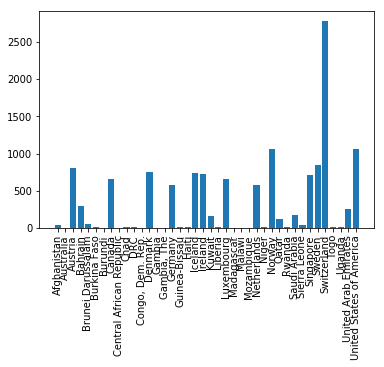

In [7]:
#plotting the different countries to have an oversight
def barplot_household_ppp(db):
    plt.bar(db.index , db["2015"])
    
barplot_household_ppp(match_household(findTop20()))
plt.xticks(rotation= 90)#plt.show()
    
    
    

In [10]:
#Plotting all the countries over 25 years
def plot_household_country(db):
    db.transpose()[3:].plot(linestyle=':')
    plt.yticks(np.arange(0,3000,250))
    plt.xticks(rotation = 90)
    plt.show()
    
#plot_household_country(matchDatabase(findTop20()))




In [8]:
def match_LE():
    l = findTop20()
    l[4]="Brunei"
    l[11] = "Congo"
    l[14] = "Gambia"
    #print(l)
    #print(life_expectancy["Entity"].unique())
    
    #print(life_expectancy)
    newDF = life_expectancy.loc[life_expectancy["Entity"].isin(l)]
    return newDF

#match_LE()



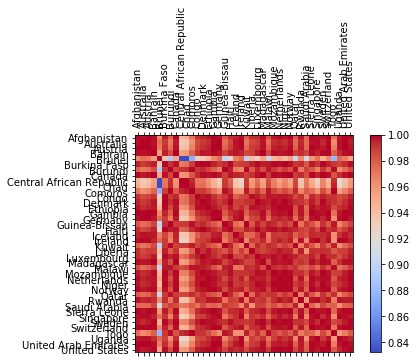

In [9]:
#merge all the data in the same format ass the Household data in order to compare it. 
def transform_LE():
    LE_top20 = match_LE()
    LE_afghanistan = LE_top20[LE_top20["Entity"]=="Afghanistan"]
    years = LE_afghanistan["Year"].values
    LE_afghanistan = LE_afghanistan.set_index(years)
    LE_afghanistan = LE_afghanistan.iloc[:,3:]
    LE_afghanistan.columns = ["Afghanistan"]
    LE_total = LE_afghanistan

    for Country in LE_top20["Entity"].unique():
        if Country not in LE_total.columns:
            LE_country = LE_top20[LE_top20["Entity"]==Country]
            years = LE_country["Year"].values
            LE_country = LE_country.set_index(years)
            LE_country = LE_country.iloc[:,3:]
            LE_country.columns = [Country]
            LE_total = pd.merge(LE_total, LE_country, left_index=True, right_index=True)
    LE_total = LE_total.T.iloc[:,50:]
    return(LE_total)

data = transform_LE().T #dit kan je ook met missingno doen.
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=(corr.min()).min(), vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

